<a href="https://colab.research.google.com/github/agravatmanas07/data-analysis-projects/blob/main/Classification_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EX-1**

In [ ]:
#pima-indians-diabetes.data.csv

import numpy as np
import pandas as pd
from imblearn . over_sampling import SMOTE
from sklearn . preprocessing import StandardScaler
from sklearn . feature_selection import SelectKBest , f_classif
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv(r'/content/pima-indians-diabetes.data.csv', sep=',', header=None)
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df.head()
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/pima-indians-diabetes.data.csv'

In [ ]:

X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(614, 8) (154, 8) (614,) (154,)


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

print(lr_model.score(X_test, y_test))
print(knn_model.score(X_test, y_test))

0.7662337662337663
0.6883116883116883


In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

matrix={"accuracy":[], "precision":[], "recall":[], "f1-score":[], "auc-roc":[]} # This line was not indented correctly

#lr
matrix["accuracy"].append(accuracy_score(y_test, y_pred_lr))
matrix["precision"].append(precision_score(y_test, y_pred_lr))
matrix["recall"].append(recall_score(y_test, y_pred_lr))
matrix["f1-score"].append(f1_score(y_test, y_pred_lr))
matrix["auc-roc"].append(roc_auc_score(y_test, y_pred_lr))
#knn
matrix["accuracy"].append(accuracy_score(y_test, y_pred_knn))
matrix["precision"].append(precision_score(y_test, y_pred_knn))
matrix["recall"].append(recall_score(y_test, y_pred_knn))
matrix["f1-score"].append(f1_score(y_test, y_pred_knn))
matrix["auc-roc"].append(roc_auc_score(y_test, y_pred_knn))

matrix=pd.DataFrame(matrix, index=["Logistic Regression", "KNN"])
matrix


,accuracy,precision,recall,f1-score,auc-roc
Logistic Regression,0.766234,0.711111,0.581818,0.640000,0.725253
KNN,0.688312,0.571429,0.509091,0.538462,0.648485


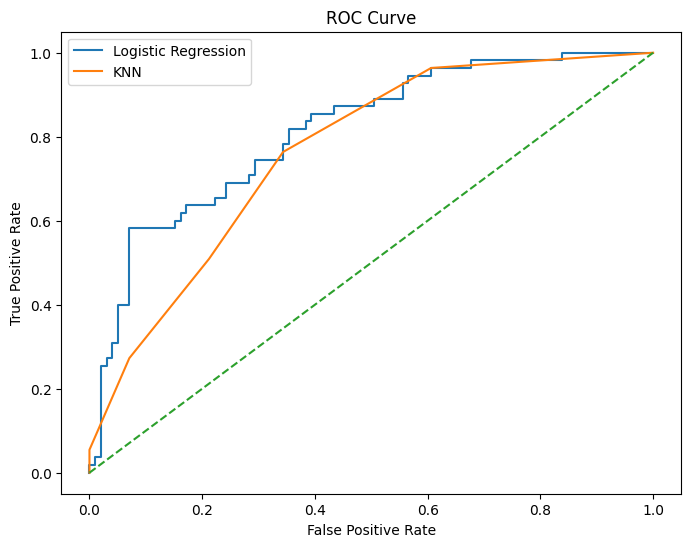

In [ ]:

def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

plt.figure(figsize=(8, 6))
plot_roc_curve(lr_model, X_test, y_test, "Logistic Regression")
plot_roc_curve(knn_model, X_test, y_test, "KNN")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.show()


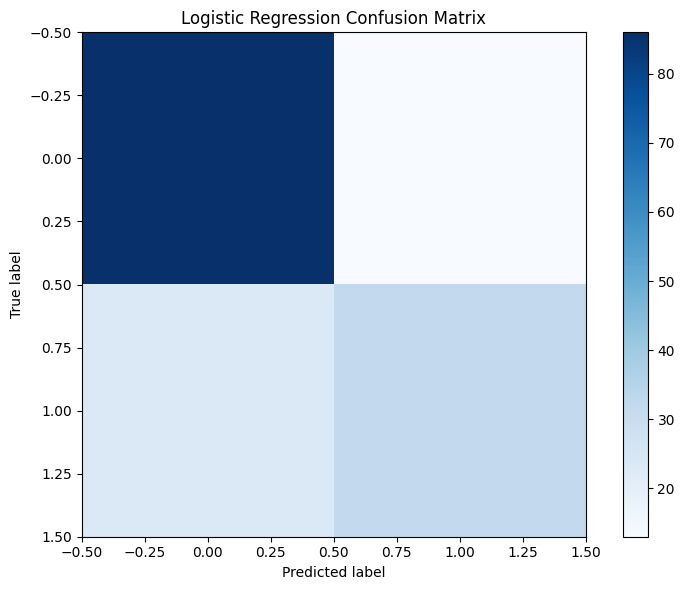

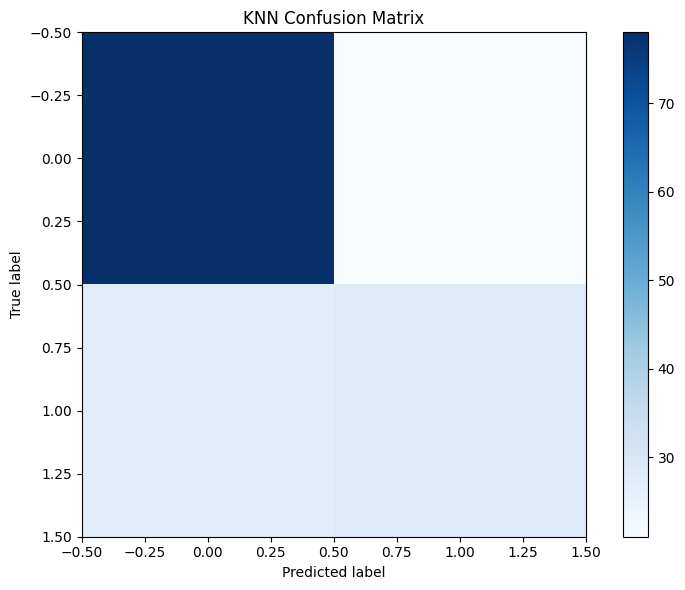

In [ ]:
def plot_confusion_matrix(model, X_test, y_test, title):
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(lr_model, X_test, y_test, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(knn_model, X_test, y_test, "KNN Confusion Matrix")

def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()


EX-2

In [ ]:
import numpy as np
import pandas as pd
from imblearn . over_sampling import SMOTE
from sklearn . preprocessing import StandardScaler
from sklearn . feature_selection import SelectKBest , f_classif
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


iris = load_iris()
X = iris.data
y = iris.target

# Convert the iris data to a Pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target # Add the target variable to the DataFrame

df.head() # Now you can use .head()
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


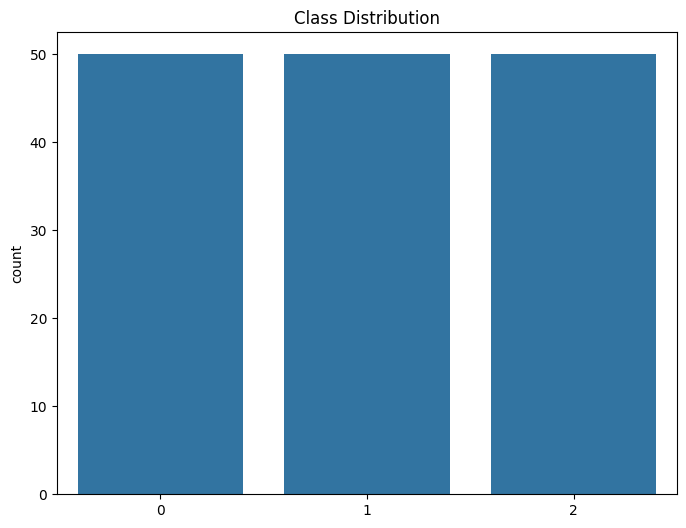

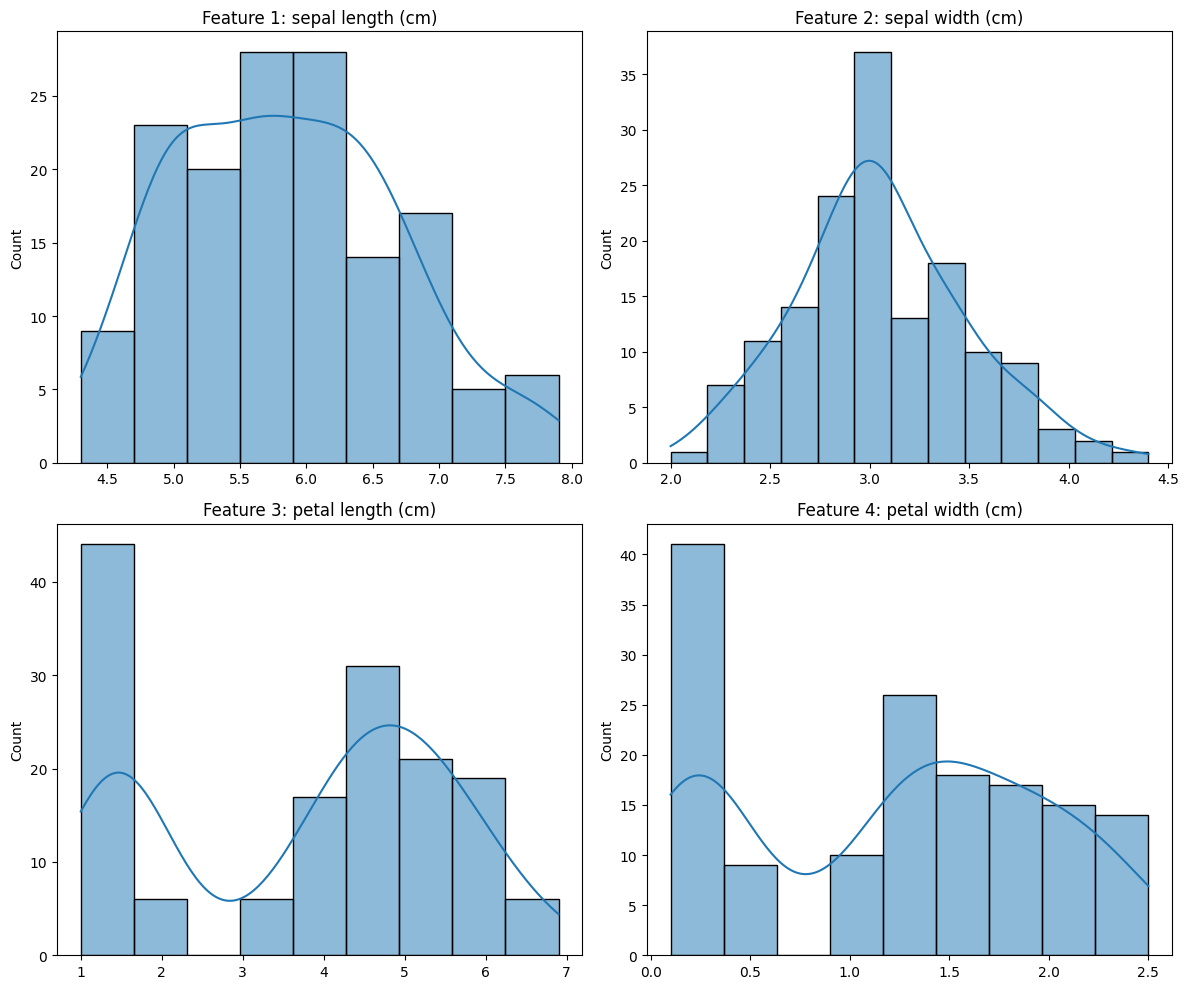

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(X[:, i], kde=True, ax=ax)
    ax.set_title(f'Feature {i+1}: {iris.feature_names[i]}')
plt.tight_layout()
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train_resampled)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)


print("Original training set shape:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Resampled training set shape:", dict(zip(*np.unique(y_train_resampled, return_counts=True))))

Original training set shape: {0: 40, 1: 41, 2: 39}
Resampled training set shape: {0: 41, 1: 41, 2: 41}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score

y_pred_lr = logreg.predict(X_test_scaled)
y_pred_DecisionTreeClassifier = dt_classifier.predict(X_test_scaled)
y_pred_RandomForestClassifier = rf_classifier.predict(X_test_scaled)

matrix={"accuracy":[], "precision":[], "recall":[], "f1-score":[], "auc-roc":[]}

#lr
matrix["accuracy"].append(accuracy_score(y_test, y_pred_lr))
matrix["precision"].append(precision_score(y_test, y_pred_lr, average='weighted')) # Specify average='weighted' for multiclass
matrix["recall"].append(recall_score(y_test, y_pred_lr, average='weighted')) # Specify average='weighted'
matrix["f1-score"].append(f1_score(y_test, y_pred_lr, average='weighted')) # Specify average='weighted'
matrix["auc-roc"].append(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled), multi_class='ovr', average='weighted')) # Specify average='weighted' for roc_auc_score

#DecisionTreeClassifier
matrix["accuracy"].append(accuracy_score(y_test, y_pred_DecisionTreeClassifier))
matrix["precision"].append(precision_score(y_test, y_pred_DecisionTreeClassifier, average='weighted')) # Specify average='weighted' for multiclass
matrix["recall"].append(recall_score(y_test, y_pred_DecisionTreeClassifier, average='weighted')) # Specify average='weighted'
matrix["f1-score"].append(f1_score(y_test, y_pred_DecisionTreeClassifier, average='weighted')) # Specify average='weighted'
matrix["auc-roc"].append(roc_auc_score(y_test, dt_classifier.predict_proba(X_test_scaled), multi_class='ovr', average='weighted')) # Specify average='weighted' for roc_auc_score

#RandomForestClassifier
matrix["accuracy"].append(accuracy_score(y_test, y_pred_RandomForestClassifier))
matrix["precision"].append(precision_score(y_test, y_pred_RandomForestClassifier, average='weighted')) # Specify average='weighted' for multiclass
matrix["recall"].append(recall_score(y_test, y_pred_RandomForestClassifier, average='weighted')) # Specify average='weighted'
matrix["f1-score"].append(f1_score(y_test, y_pred_RandomForestClassifier, average='weighted')) # Specify average='weighted'
matrix["auc-roc"].append(roc_auc_score(y_test, rf_classifier.predict_proba(X_test_scaled), multi_class='ovr', average='weighted')) # Specify average='weighted' for roc_auc_score

matrix=pd.DataFrame(matrix, index=["Logistic Regression", "DecisionTreeClassifier","RandomForestClassifier"])
matrix

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,accuracy,precision,recall,f1-score,auc-roc
Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
DecisionTreeClassifier,0.333333,0.111111,0.333333,0.166667,0.500000
RandomForestClassifier,0.333333,0.111111,0.333333,0.166667,0.696429


EX-3

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
from scipy.stats import zscore

#df_zscore = df.apply(zscore)  # Remove or comment out this line to avoid applying zscore to the entire DataFrame, including the target variable
x=df.drop('target', axis=1) # Using the original df instead of df_zscore
y=df['target'] # Using the original target variable

from scipy.stats import zscore

#df_zscore = df.apply(zscore)  # Remove or comment out this line to avoid applying zscore to the entire DataFrame, including the target variable
x=df.drop('target', axis=1) # Using the original df instead of df_zscore
y=df['target'] # Using the original target variable

# Apply zscore only to the features (X)
x = x.apply(zscore)
x=x[(abs(zscore(x)) <=3).all(axis=1)]
y=y[x.index]
print(zscore(x).shape, y.shape)
x
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Use x instead of X

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x) # Use x here as well

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


print("Original training set shape:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Resampled training set shape:", dict(zip(*np.unique(y_train_resampled, return_counts=True))))



(495, 30) (495,)
Original training set shape: {0: 125, 1: 271}
Resampled training set shape: {0: 271, 1: 271}


In [ ]:

from sklearn.svm import SVC # Import the SVC class from sklearn.svm

# Linear SVM
svm_linear = SVC(kernel='linear', random_state=42, probability=True)
svm_linear.fit(X_train, y_train)

# RBF SVM
svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

matrix={"accuracy":[], "precision":[], "recall":[], "f1-score":[], "auc-roc":[]}

# Linear SVM
matrix["accuracy"].append(accuracy_score(y_test, y_pred_linear))
matrix["precision"].append(precision_score(y_test, y_pred_linear, average='weighted')) # Specify average='weighted' for multiclass
matrix["recall"].append(recall_score(y_test, y_pred_linear, average='weighted')) # Specify average='weighted'
matrix["f1-score"].append(f1_score(y_test, y_pred_linear, average='weighted')) # Specify average='weighted'
# Use X_test instead of X_test_scaled and select the probability for the positive class (index 1)
matrix["auc-roc"].append(roc_auc_score(y_test, svm_linear.predict_proba(X_test)[:, 1], average='weighted')) # Specify average='weighted' for roc_auc_score

# RBF SVM
matrix["accuracy"].append(accuracy_score(y_test, y_pred_rbf))
matrix["precision"].append(precision_score(y_test,y_pred_rbf, average='weighted')) # Specify average='weighted' for multiclass
matrix["recall"].append(recall_score(y_test, y_pred_rbf, average='weighted')) # Specify average='weighted'
matrix["f1-score"].append(f1_score(y_test, y_pred_rbf, average='weighted')) # Specify average='weighted'
# Use X_test instead of X_test_scaled and select the probability for the positive class (index 1)
matrix["auc-roc"].append(roc_auc_score(y_test, svm_rbf.predict_proba(X_test)[:, 1], average='weighted')) # Specify average='weighted' for roc_auc_score

matrix=pd.DataFrame(matrix, index=["svm_linear","svm_rbf"])
matrix

,accuracy,precision,recall,f1-score,auc-roc
svm_linear,0.979798,0.980439,0.979798,0.979688,0.999569
svm_rbf,1.000000,1.000000,1.000000,1.000000,1.000000


EX-4

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()
# Separate features (X) and target (y)
x = titanic.drop('survived', axis=1)
y = titanic['survived']
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
categorical_features = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
x = pd.get_dummies(x, columns=categorical_features, dummy_na=False)

for col in x.select_dtypes(include=['bool']).columns:
    x[col] = x[col].astype(int)
# The 'x' should be aligned with the for loop, not inside it.
x

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,...,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,alone_False,alone_True
0,3,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
889,1,26.0,0,0,30.0000,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
titanicnumerical_features = ['pclass', 'age', 'sibsp', 'parch', 'fare']
titanic_numerical = titanic[titanicnumerical_features]


# Apply Z-score normalization

scaler = StandardScaler()
titanic_numerical = scaler.fit_transform(titanic_numerical)

titanic_normalized = pd.DataFrame(titanic_numerical, columns=titanicnumerical_features, index=titanic.index)
titanic = pd.concat([titanic.drop(columns=titanicnumerical_features), titanic_normalized], axis=1)


titanic.dropna(inplace=True)

X = titanic.drop('survived', axis=1)
y = titanic['survived']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training set shape:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Resampled training set shape:", dict(zip(*np.unique(y_train_resampled, return_counts=True))))

Original training set shape: {0: 46, 1: 99}
Resampled training set shape: {0: 99, 1: 99}


In [ ]:
import pandas as pd
from scipy.stats import zscore

## w score (normalization)
x = x[(abs(zscore(x)) <= 3).all(axis=1)]
y = y[x.index]

print(zscore(x).shape, y.shape)
x

(0, 32) (0,)


,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,...,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,alone_False,alone_True


In [ ]:

x=pd.get_dummies(x)
x

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,...,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,alone_False,alone_True


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score


In [ ]:
svm_imb = SVC(kernel='rbf', random_state=42, probability=True)
svm_imb.fit(X_train, y_train)

svm_bal = SVC(kernel='rbf', random_state=42, probability=True)
svm_bal.fit(X_train_resampled, y_train_resampled)


y_pred_imb = svm_imb.predict(X_test)
y_pred_bal = svm_bal.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score

matrix={"accuracy":[], "precision":[], "recall":[], "f1-score":[]}


matrix["accuracy"].append(accuracy_score(y_test, y_pred_imb))
matrix["precision"].append(precision_score(y_test, y_pred_imb, average='weighted'))
matrix["recall"].append(recall_score(y_test, y_pred_imb, average='weighted'))
matrix["f1-score"].append(f1_score(y_test,y_pred_imb, average='weighted'))


matrix["accuracy"].append(accuracy_score(y_test, y_pred_bal))
matrix["precision"].append(precision_score(y_test,y_pred_bal, average='weighted'))
matrix["recall"].append(recall_score(y_test, y_pred_bal, average='weighted'))
matrix["f1-score"].append(f1_score(y_test , y_pred_bal, average='weighted'))
matrix

print("Evaluation for Imbalanced Model:")

print("\nEvaluation for Balanced Model:")

Evaluation for Imbalanced Model:

Evaluation for Balanced Model:


In [ ]:
matrix=pd.DataFrame(matrix)#, index=["svm_imb","svm_rbf"])
matrix

,accuracy,precision,recall,f1-score
0,0.972973,0.974054,0.972973,0.972708
1,0.972973,0.974054,0.972973,0.972708


EX-5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Step 1: Data Loading
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

Decision Tree - Accuracy: 1.0 Precision: 1.0
Random Forest - Accuracy: 1.0 Precision: 1.0
KNN - Accuracy: 1.0 Precision: 1.0


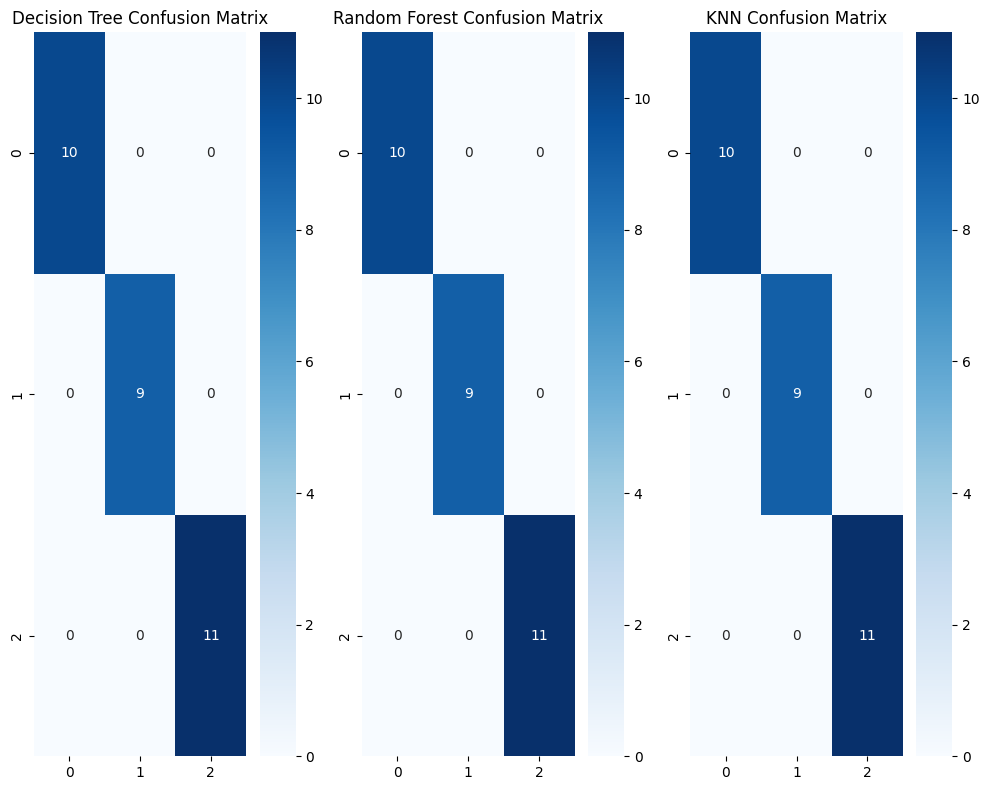

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set for each model
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy and precision for each model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')  # Use 'weighted' for multiclass

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')

# Print the evaluation metrics
print("Decision Tree - Accuracy:", accuracy_dt, "Precision:", precision_dt)
print("Random Forest - Accuracy:", accuracy_rf, "Precision:", precision_rf)
print("KNN - Accuracy:", accuracy_knn, "Precision:", precision_knn)

# Create confusion matrices
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize confusion matrices using heatmaps
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
sns.heatmap(cm_dt, annot=True, cmap="Blues", fmt="d")
plt.title("Decision Tree Confusion Matrix")

plt.subplot(1, 3, 2)
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest Confusion Matrix")

plt.subplot(1, 3, 3)
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d")
plt.title("KNN Confusion Matrix")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the models
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
knn_classifier = KNeighborsClassifier()

dt_classifier.fit(X_train_scaled, y_train)
rf_classifier.fit(X_train_scaled, y_train)
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test_scaled)
y_pred_rf = rf_classifier.predict(X_test_scaled)
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Initialize the results dictionary
matrix = {"accuracy": [], "precision": [], "recall": [], "f1-score": [], "auc-roc": []}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_pred_proba):
    matrix["accuracy"].append(accuracy_score(y_true, y_pred))
    matrix["precision"].append(precision_score(y_true, y_pred, average='weighted'))
    matrix["recall"].append(recall_score(y_true, y_pred, average='weighted'))
    matrix["f1-score"].append(f1_score(y_true, y_pred, average='weighted'))
    matrix["auc-roc"].append(roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='weighted'))

# Calculate metrics for each model
calculate_metrics(y_test, y_pred_dt, dt_classifier.predict_proba(X_test_scaled))
calculate_metrics(y_test, y_pred_rf, rf_classifier.predict_proba(X_test_scaled))
calculate_metrics(y_test, y_pred_knn, knn_classifier.predict_proba(X_test_scaled))

# Create DataFrame
matrix = pd.DataFrame(matrix, index=["Decision Tree", "Random Forest", "KNN"])

# Display the results
print(matrix)

               accuracy  precision  recall  f1-score  auc-roc
Decision Tree       1.0        1.0     1.0       1.0      1.0
Random Forest       1.0        1.0     1.0       1.0      1.0
KNN                 1.0        1.0     1.0       1.0      1.0
